In [1]:
from typing import List
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_loader import (
    load_results,
)

In [2]:
ROOT_DIR = Path.cwd().parent
DATA_DIR = ROOT_DIR / 'data'

In [3]:
DIVIDE_AND_CONQUER_RESULTS_DIR = DATA_DIR / 'results' / 'divideAndConquer'
assert DIVIDE_AND_CONQUER_RESULTS_DIR.exists()

In [4]:
def show(df: pd.DataFrame, lines: int = 5) -> None:
    display(df.head(lines))
    print(f"Shape: {df.shape}")


def aggregate_data(
    df: pd.DataFrame,
    groupby_columns: List[str],
    round_to: int = 0,
) -> pd.DataFrame:
    """Compute the mean time for each group of experiments,
    std and confidence interval.
    Args:
        df: DataFrame with the data
        groupby_columns: Columns to group by
    Returns:
        DataFrame with the mean time for each group of experiments
    """
    means = df.groupby(groupby_columns).agg(
        mean_time=("time", "mean"),
        std_time=("time", "std"),
        ci_time=("time", lambda x: 1.96 * np.std(x) / np.sqrt(len(x))),
    )

    means["ci_time"] = means.apply(
        lambda x: (
            round(x["mean_time"] - x["ci_time"], round_to),
            round(x["mean_time"] + x["ci_time"], round_to),
        ),
        axis=1,
    )

    means = means.round(round_to)
    if round_to == 0:
        means["mean_time"] = means["mean_time"].astype(int)
        means["std_time"] = means["std_time"].astype(int)
        means["ci_time"] = means["ci_time"].apply(lambda x: (int(x[0]), int(x[1])))
    return means.reset_index()

In [5]:
DIVIDE_AND_CONQUER_RESULTS_DIR

PosixPath('/home/pabloskewes/FCFM/Diseño y Análisis de Algoritmos/diseno-y-analisis-de-algoritmos/tarea3/data/results/divideAndConquer')

In [16]:
FIRST_EXPERIMENT = 0

divide_and_conquer_df = load_results(DIVIDE_AND_CONQUER_RESULTS_DIR)
divide_and_conquer_df = divide_and_conquer_df.astype(int)
divide_and_conquer_df = divide_and_conquer_df[divide_and_conquer_df["experiment"] >= FIRST_EXPERIMENT]

Skipping /home/pabloskewes/FCFM/Diseño y Análisis de Algoritmos/diseno-y-analisis-de-algoritmos/tarea3/data/results/divideAndConquer/n_20exp_94.csv due to invalid data
Skipping /home/pabloskewes/FCFM/Diseño y Análisis de Algoritmos/diseno-y-analisis-de-algoritmos/tarea3/data/results/divideAndConquer/n_10exp_94.csv due to invalid data
Skipping /home/pabloskewes/FCFM/Diseño y Análisis de Algoritmos/diseno-y-analisis-de-algoritmos/tarea3/data/results/divideAndConquer/n_30exp_94.csv due to invalid data
Skipping /home/pabloskewes/FCFM/Diseño y Análisis de Algoritmos/diseno-y-analisis-de-algoritmos/tarea3/data/results/divideAndConquer/n_15exp_94.csv due to invalid data
Skipping /home/pabloskewes/FCFM/Diseño y Análisis de Algoritmos/diseno-y-analisis-de-algoritmos/tarea3/data/results/divideAndConquer/n_5exp_94.csv due to invalid data
Skipping /home/pabloskewes/FCFM/Diseño y Análisis de Algoritmos/diseno-y-analisis-de-algoritmos/tarea3/data/results/divideAndConquer/n_25exp_94.csv due to invali

In [17]:
divide_and_conquer_df

,n,time,experiment
0,25,37621334,89
1,15,22493240,60
2,25,36879801,97
3,15,22679921,74
4,25,37353050,47
...,...,...,...
988,25,37636909,70
989,10,14695511,21
990,40,64330311,41
991,10,14473642,95


In [18]:
ROUND_TO = 0

div_and_conq = aggregate_data(
    divide_and_conquer_df,
    groupby_columns=["n"],
    round_to=ROUND_TO,
)


In [20]:
show(div_and_conq, lines=10)

,n,mean_time,std_time,ci_time
0,5,7013347,44196,"(7004685, 7022009)"
1,10,14718864,83744,"(14702451, 14735277)"
2,15,22418614,117875,"(22395512, 22441716)"
3,20,30775835,160610,"(30744357, 30807313)"
4,25,37372369,187433,"(37335634, 37409103)"
5,30,46915708,235005,"(46869650, 46961767)"
6,35,56779833,311319,"(56718818, 56840849)"
7,40,64508651,356523,"(64439123, 64578179)"
8,45,71448246,350257,"(71379940, 71516552)"
9,50,78343703,353886,"(78274689, 78412717)"


Shape: (10, 4)


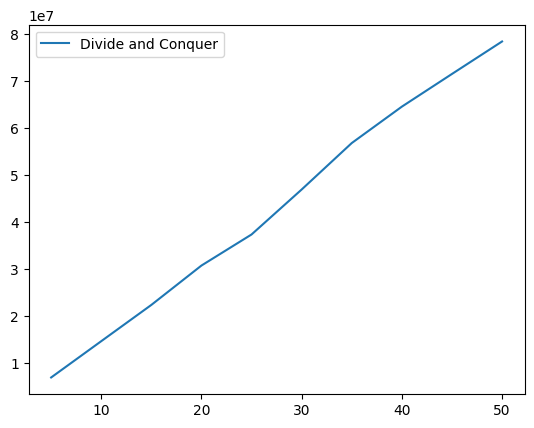

In [21]:
plt.plot(div_and_conq["n"], div_and_conq["mean_time"], label="Divide and Conquer")
plt.xlabel("Size of the array")
plt.ylabel("Time (μs)")
plt.title("E
# plt.plot(optimal_radix["universe"], optimal_radix["mean_time"], label="Radix Sort")
plt.legend();